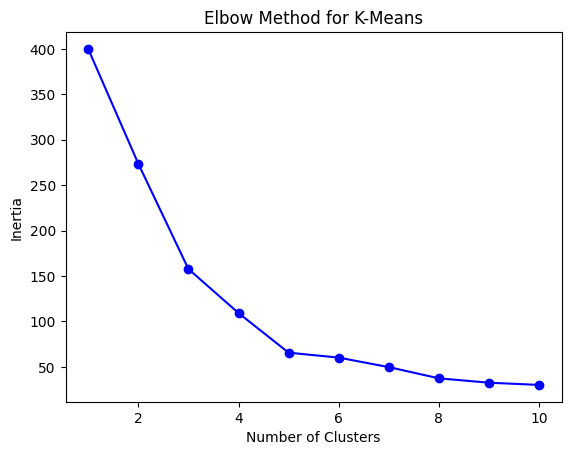

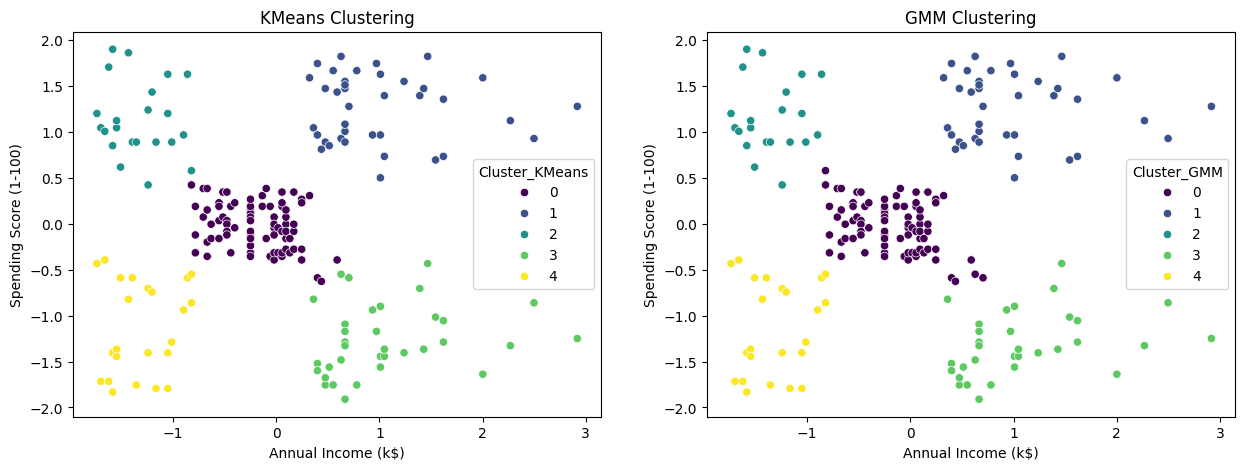

KMeans Silhouette Score: 0.5547
KMeans Davies-Bouldin Index: 0.5722
GMM Silhouette Score: 0.5537
GMM Davies-Bouldin Index: 0.5760


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load and preprocess dataset
df = pd.read_csv('/content/Mall_Customers.csv')
df['Genre'] = LabelEncoder().fit_transform(df['Genre'])
df[['Annual Income (k$)', 'Spending Score (1-100)']] = StandardScaler().fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])

# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# K-Means Clustering (Elbow method for optimal clusters)
inertia = [KMeans(n_clusters=k, random_state=42).fit(X).inertia_ for k in range(1, 11)]
plt.plot(range(1, 11), inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-Means')
plt.show()

# Apply K-Means and GMM clustering
optimal_clusters = 5
df['Cluster_KMeans'] = KMeans(n_clusters=optimal_clusters, random_state=42).fit_predict(X)
df['Cluster_GMM'] = GaussianMixture(n_components=optimal_clusters, random_state=42).fit_predict(X)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
for i, method in enumerate(['KMeans', 'GMM']):
    sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue=f'Cluster_{method}', palette='viridis', ax=axes[i])
    axes[i].set_title(f'{method} Clustering')
plt.show()

# Evaluation metrics
for method in ['KMeans', 'GMM']:
    labels = df[f'Cluster_{method}']
    silhouette = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    print(f'{method} Silhouette Score: {silhouette:.4f}')
    print(f'{method} Davies-Bouldin Index: {davies_bouldin:.4f}')
